In [1]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score

In [2]:
project_root = os.environ.get('DSPORTFOLIO_DIRECTORY')
df = pd.read_json(f'{project_root}/DataScience/netherlands-rent-properties/properties.json', lines=True)
df.head()

,_id,externalId,areaRaw,areaSqm,city,coverImageUrl,crawlStatus,crawledAt,datesPublished,firstSeenAt,...,roommates,shower,smokingInside,toilet,userDisplayName,userId,userLastLoggedOn,userMemberSince,userPhotoUrl,additionalCostsDescription
0,{'$oid': '5d2b113a43cbfd7c77a998f4'},room-1686123,14 m2,14,Rotterdam,https://resources.kamernet.nl/image/913b4b03-5...,done,{'$date': '2019-07-26T22:18:23.018+0000'},"[{'$date': '2019-07-14T11:25:46.511+0000'}, {'...",{'$date': '2019-07-14T11:25:46.511+0000'},...,5,Shared,No,Shared,Huize west,4680711.0,21-07-2019,26-06-2019,https://resources.kamernet.nl/Content/images/s...,NaN
1,{'$oid': '5d2b113a43cbfd7c77a9991a'},studio-1691193,30 m2,30,Amsterdam,https://resources.kamernet.nl/image/5e11d6b5-8...,done,{'$date': '2019-08-10T22:28:46.099+0000'},"[{'$date': '2019-07-14T11:25:46.677+0000'}, {'...",{'$date': '2019-07-14T11:25:46.677+0000'},...,None,Own,No,Own,Cor,1865530.0,20-07-2019,05-01-2012,https://resources.kamernet.nl/Content/images/p...,NaN
2,{'$oid': '5d2b113a43cbfd7c77a99931'},room-1690545,11 m2,11,Amsterdam,https://resources.kamernet.nl/image/74b93a27-a...,done,{'$date': '2019-10-02T22:00:33.141+0000'},"[{'$date': '2019-07-14T11:25:46.834+0000'}, {'...",{'$date': '2019-07-14T11:25:46.834+0000'},...,1,Shared,Yes,Shared,Felix,4466569.0,20-07-2019,05-07-2018,https://resources.kamernet.nl/Content/images/p...,NaN
3,{'$oid': '5d2b113a43cbfd7c77a9994a'},room-1680036,16 m2,16,Assen,https://resources.kamernet.nl/image/84e95365-6...,done,{'$date': '2019-07-18T22:00:31.018+0000'},"[{'$date': '2019-07-14T11:25:46.988+0000'}, {'...",{'$date': '2019-07-14T11:25:46.988+0000'},...,4,Shared,Yes,Shared,Albert,783341.0,26-07-2019,09-11-2006,https://resources.kamernet.nl/Content/images/p...,NaN
4,{'$oid': '5d2b113b43cbfd7c77a9997c'},room-1691356,22 m2,22,Rotterdam,https://resources.kamernet.nl/Content/images/p...,done,{'$date': '2019-08-12T02:06:14.635+0000'},"[{'$date': '2019-07-14T11:25:47.193+0000'}, {'...",{'$date': '2019-07-14T11:25:47.193+0000'},...,1,Shared,No,Shared,John,3338401.0,19-07-2019,24-08-2014,https://resources.kamernet.nl/image/3177baf7-5...,NaN


In [3]:
df.describe()

,areaSqm,latitude,longitude,rent,additionalCosts,deposit,userId
count,46722.000000,46722.000000,46722.000000,46722.000000,14301.000000,27704.000000,4.662200e+04
mean,31.616626,52.201846,5.314911,667.745516,69.648346,713.447083,3.425398e+06
std,29.863150,0.517203,0.798989,416.667339,132.432817,942.256946,1.327936e+06
min,6.000000,50.770041,3.410016,1.000000,0.000000,0.000000,6.240000e+02
25%,14.000000,51.925491,4.711688,395.000000,0.000000,360.000000,2.894253e+06
50%,20.000000,52.162498,5.082988,550.000000,13.000000,500.000000,3.934324e+06
75%,40.000000,52.370420,5.896362,800.000000,99.000000,850.000000,4.515906e+06
max,675.000000,53.434608,7.206637,5999.000000,5000.000000,107514.000000,4.854533e+06


In [4]:
print(*df.columns, sep="\n")

_id
externalId
areaRaw
areaSqm
city
coverImageUrl
crawlStatus
crawledAt
datesPublished
firstSeenAt
furnish
lastSeenAt
latitude
longitude
postalCode
postedAgo
propertyType
rawAvailability
rent
rentDetail
rentRaw
source
title
url
additionalCosts
additionalCostsRaw
deposit
depositRaw
descriptionNonTranslated
descriptionNonTranslatedRaw
descriptionTranslated
descriptionTranslatedRaw
detailsCrawledAt
energyLabel
gender
internet
isRoomActive
kitchen
living
matchAge
matchAgeBackup
matchCapacity
matchGender
matchGenderBackup
matchLanguages
matchStatus
matchStatusBackup
pageDescription
pageTitle
pets
registrationCost
registrationCostRaw
roommates
shower
smokingInside
toilet
userDisplayName
userId
userLastLoggedOn
userMemberSince
userPhotoUrl
additionalCostsDescription


In [5]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
    display(df.head())

,_id,externalId,areaRaw,areaSqm,city,coverImageUrl,crawlStatus,crawledAt,datesPublished,firstSeenAt,furnish,lastSeenAt,latitude,longitude,postalCode,postedAgo,propertyType,rawAvailability,rent,rentDetail,rentRaw,source,title,url,additionalCosts,additionalCostsRaw,deposit,depositRaw,descriptionNonTranslated,descriptionNonTranslatedRaw,descriptionTranslated,descriptionTranslatedRaw,detailsCrawledAt,energyLabel,gender,internet,isRoomActive,kitchen,living,matchAge,matchAgeBackup,matchCapacity,matchGender,matchGenderBackup,matchLanguages,matchStatus,matchStatusBackup,pageDescription,pageTitle,pets,registrationCost,registrationCostRaw,roommates,shower,smokingInside,toilet,userDisplayName,userId,userLastLoggedOn,userMemberSince,userPhotoUrl,additionalCostsDescription
0,{'$oid': '5d2b113a43cbfd7c77a998f4'},room-1686123,14 m2,14,Rotterdam,https://resources.kamernet.nl/image/913b4b03-5...,done,{'$date': '2019-07-26T22:18:23.018+0000'},"[{'$date': '2019-07-14T11:25:46.511+0000'}, {'...",{'$date': '2019-07-14T11:25:46.511+0000'},Unfurnished,{'$date': '2019-07-26T22:18:23.142+0000'},51.896601,4.514993,3074HN,4w,Room,26-06-'19 - Indefinite period,500,,"€ 500,-",kamernet,West-Varkenoordseweg,https://kamernet.nl/en/for-rent/room-rotterdam...,50.0,\n € 50\n ...,500.0,\n € 500\n ...,"Nice room for rent, accros the Feyenoord stadi...","\nNice room for rent, accros the Feyenoord sta...","Nice room for rent, accros the Feyenoord stadi...","\nNice room for rent, accros the Feyenoord sta...",{'$date': '2019-07-22T07:10:41.849+0000'},Unknown,Mixed,Yes,true,Shared,None,16 years -\n 99 years,16 years -\n 99 years,1 person,Not important,Not important,Not important,Not important,Not important,"Room for rent in Rotterdam, West-Varkenoordse...",Room for rent in Rotterdam €500 | Kamernet,No,0,\n € 0\n ...,5,Shared,No,Shared,Huize west,4680711.0,21-07-2019,26-06-2019,https://resources.kamernet.nl/Content/images/s...,NaN
1,{'$oid': '5d2b113a43cbfd7c77a9991a'},studio-1691193,30 m2,30,Amsterdam,https://resources.kamernet.nl/image/5e11d6b5-8...,done,{'$date': '2019-08-10T22:28:46.099+0000'},"[{'$date': '2019-07-14T11:25:46.677+0000'}, {'...",{'$date': '2019-07-14T11:25:46.677+0000'},Furnished,{'$date': '2019-08-10T22:28:46.229+0000'},52.370200,4.920721,1018AS,4w,Studio,15-08-'19 - Indefinite period,950,Utilities incl.,"€ 950,- Utilities incl.",kamernet,Parelstraat,https://kamernet.nl/en/for-rent/studio-amsterd...,0.0,\n € 0\n ...,895.0,\n € 895\n ...,"Efficiently furnished, with a large balcony, a...","\nEfficiently furnished, with a large balcony,...","Efficiently furnished, with a large balcony, a...","\nEfficiently furnished, with a large balcony,...",{'$date': '2019-07-22T06:29:33.112+0000'},Unknown,Unknown,Yes,true,Own,Own,18 years -\n 99 years,18 years -\n 99 years,1 person,Not important,Not important,Not important,"Working student, Working","Working student, Working","Studio for rent in Amsterdam, Parelstraat, fo...",Studio for rent in Amsterdam €950 | Kamernet,No,0,\n € 0\n ...,None,Own,No,Own,Cor,1865530.0,20-07-2019,05-01-2012,https://resources.kamernet.nl/Content/images/p...,NaN
2,{'$oid': '5d2b113a43cbfd7c77a99931'},room-1690545,11 m2,11,Amsterdam,https://resources.kamernet.nl/image/74b93a27-a...,done,{'$date': '2019-10-02T22:00:33.141+0000'},"[{'$date': '2019-07-14T11:25:46.834+0000'}, {'...",{'$date': '2019-07-14T11:25:46.834+0000'},Furnished,{'$date': '2019-10-02T22:00:33.264+0000'},52.350880,4.854786,1075SB,09 Jul,Room,01-08-'19 - Indefinite period,1000,Utilities incl.,"€ 1000,- Utilities incl.",kamernet,Zeilstraat,https://kamernet.nl/en/for-rent/room-amsterdam...,NaN,\n -\n ...,1000.0,\n € 1000\n ...,Kamer van 11m2 vlakbij het Vondelpark. Met een...,\nKamer van 11m2 vlakbij het Vondelpark. Met e...,Kamer van 11m2 vlakbij het Vondelpark. Met een...,\nKamer van 11m2 vlakbij het Vondelpark. Met e...,{'$date': '2019-07-21T08:44:32.816+0000'},Unknown,Mixed,Yes,true,Shared,Shared,16 years -\n 93 years,16 years -\n 93 years,1 person,Not important,Not i

In [6]:
df.city.unique()
# Too many cities, considering creating a new column with the avg rent in each city

array(['Rotterdam', 'Amsterdam', 'Assen', 'Groningen', 'Zeist',
       'Maastricht', 'Callantsoog', 'Alphen aan den Rijn', 'Tilburg',
       'Enschede', 'Leeuwarden', 'Eindhoven', 'Wageningen', 'Diemen',
       'Utrecht', 'Almere', 'Alkmaar', 'Harderwijk', 'Hilversum', 'Delft',
       'Den Bosch', 'Stoutenburg', 'Leiden', 'Den Haag', 'Boxtel',
       'Badhoevedorp', 'Veenendaal', 'Amstelveen', 'Nijmegen', 'Venlo',
       'Ubbena', 'Zwolle', 'Arnhem', 'Leimuiden', 'Riel', 'Nieuwegein',
       'Haren Gn', 'Uitgeest', 'Beverwijk', 'Ede', 'Nijkerk',
       'Amersfoort', 'Loosdrecht', 'Apeldoorn', 'Vaals', 'Velp',
       'Vlaardingen', 'Montfoort', 'Heemstede', 'Breda', 'Purmerend',
       'Baarn', 'Spijkenisse', 'Deventer', 'Hengelo', 'Haarlem',
       'Capelle aan den IJssel', 'Bovenkarspel', 'Weesp', 'Harskamp',
       'Zeeland', 'Waalre', 'IJsselstein', 'Pijnacker', 'Sittard',
       'Putten', 'Vlissingen', 'Rijswijk', 'Zandvoort', 'Zutphen',
       'Heerlen', 'Breukeleveen', 'Hoofddorp

In [7]:
df.roommates.unique()

array(['5', 'None', '1', '4', '7', '3', '2', '8', 'More than 8', nan, '6',
       'Unknown', None], dtype=object)

In [8]:
df.roommates.value_counts()

Unknown        10401
2               7289
None            6408
1               6361
3               6322
4               3626
5               1976
More than 8     1568
6                847
7                551
8                461
Name: roommates, dtype: int64

In [9]:
#importantColumns = _id, areaSqm, city, furnish, propertyType, gender, internet, isRoomActive, kitchen, living, matchCapacity, matchGender, pets, roommates, shower, smokingInside, toilet
#yColumns = rent, rentDetail, additionalCosts, deposit
#extraColumns = datesPublished, postalCode, rawAvailability, gender, descriptionNonTranslated, descriptionTranslated, energyLabel, matchAge, matchCapacity, matchGender, matchLanguages, matchStatus, registrationCost

#Xraw = areaSqm, city, furnish, propertyType, internet, isRoomActive, kitchen, living, pets, roommates, shower, smokingInside, toilet
#y = rent + additionalCosts

# areaSqm :
# city : avg y over each city
# furnish : Is 'Furnished' = 1 else 0
# propertyType : 1hot
# internet : Is 'Yes' = 1 else 0
# isRoomActive : bool to int
# kitchen : 1hot - 'Shared', 'Own' , 'None' - 'Unknown', nan replace with mode
# living : 1hot - 'Shared', 'Own' , 'None' - 'Unknown', nan replace with mode
# pets : bool to int - other replace with mode
# roommates : int - more than 8 = 8 - other replace with mode
# shower : 1hot - 'Shared', 'Own' , 'None' - 'Unknown', nan replace with mode
# smokingInside : bool to int - other replace with mode
# toilet : 1hot - 'Shared', 'Own' , 'None' - 'Unknown', nan replace with mode

In [10]:
y = df.rent + df.additionalCosts.fillna(0)

y.describe()

count    46722.000000
mean       689.063974
std        430.063790
min          1.000000
25%        400.000000
50%        550.000000
75%        850.000000
max       6450.000000
dtype: float64

In [11]:
columnNamesRaw = ['areaSqm', 'city', 'furnish', 'propertyType', 'internet', 'isRoomActive',
                  'kitchen', 'living', 'pets', 'roommates', 'shower', 'smokingInside', 'toilet']

Xraw = df[columnNamesRaw].copy()

Xraw['y'] = y

In [12]:
Xraw.city = Xraw.city.str.lower()

Xraw["cityAvg"] = (
    Xraw.groupby('city')
    ['y']
    .transform('mean')
)

Xraw.head()

,areaSqm,city,furnish,propertyType,internet,isRoomActive,kitchen,living,pets,roommates,shower,smokingInside,toilet,y,cityAvg
0,14,rotterdam,Unfurnished,Room,Yes,true,Shared,None,No,5,Shared,No,Shared,550.0,725.475073
1,30,amsterdam,Furnished,Studio,Yes,true,Own,Own,No,None,Own,No,Own,950.0,996.345893
2,11,amsterdam,Furnished,Room,Yes,true,Shared,Shared,Yes,1,Shared,Yes,Shared,1000.0,996.345893
3,16,assen,Unfurnished,Room,Yes,false,Shared,None,No,4,Shared,Yes,Shared,290.0,539.936170
4,22,rotterdam,Unfurnished,Room,Unknown,true,Own,Own,No,1,Shared,No,Shared,475.0,725.475073


In [13]:
Xraw['isFurnished'] = (Xraw.furnish == 'Furnished').astype(int)
Xraw['hasInternet'] = (Xraw.internet == 'Yes').astype(int)
Xraw['allowsPets'] = (Xraw.pets == 'Yes').astype(int)
Xraw['allowsSmokingInside'] = (Xraw.smokingInside == 'Yes').astype(int)

In [14]:
Xraw['isRoomActiveInt'] = Xraw.isRoomActive.fillna(
    'true').map({'true': 1, 'false': 0})

In [15]:
dummy = pd.get_dummies(Xraw.propertyType)

Xraw = pd.concat([Xraw, dummy], axis=1)

In [16]:
Xraw['kitchenRdy'] = Xraw.kitchen.apply(
    lambda x: 'Shared' if x != 'Shared' and x != 'Own' and x != 'None' else x)
Xraw['livingRdy'] = Xraw.living.apply(
    lambda x: 'Shared' if x != 'Shared' and x != 'Own' and x != 'None' else x)
Xraw['showerRdy'] = Xraw.shower.apply(
    lambda x: 'Shared' if x != 'Shared' and x != 'Own' and x != 'None' else x)
Xraw['toiletRdy'] = Xraw.toilet.apply(
    lambda x: 'Shared' if x != 'Shared' and x != 'Own' and x != 'None' else x)

kitchenRdyDummy = pd.get_dummies(Xraw.kitchenRdy, prefix='kitchen')
livingRdyDummy = pd.get_dummies(Xraw.livingRdy, prefix='living')
showerRdyDummy = pd.get_dummies(Xraw.showerRdy, prefix='shower')
toiletRdyDummy = pd.get_dummies(Xraw.toiletRdy, prefix='toilet')

Xraw = pd.concat([Xraw, kitchenRdyDummy, livingRdyDummy,
                  showerRdyDummy, toiletRdyDummy], axis=1)

In [17]:
Xraw['roommatesUnknown'] = (Xraw.roommates == 'Unknown').astype(int)

Xraw.roommates = Xraw.roommates.fillna(0)
Xraw['roommatesInt'] = Xraw.roommates.apply(
    lambda x: 0 if x == 'None' or x is None else (9 if x == 'More than 8' else x))
Xraw.roommatesInt = Xraw.roommatesInt.replace(
    'Unknown', Xraw.loc[Xraw.roommatesInt != 'Unknown'].roommatesInt.astype(int).mean()).astype(float)

In [18]:
X = Xraw.drop(['city', 'furnish', 'propertyType', 'internet', 'isRoomActive', 'kitchen', 'living', 'kitchenRdy', 'livingRdy',
               'pets', 'roommates', 'shower', 'showerRdy', 'smokingInside', 'toilet', 'toiletRdy', 'y'], axis=1)  # , inplace=True)

X.value_counts()

areaSqm  cityAvg     isFurnished  hasInternet  allowsPets  allowsSmokingInside  isRoomActiveInt  Anti-squat  Apartment  Room  Student residence  Studio  kitchen_None  kitchen_Own  kitchen_Shared  living_None  living_Own  living_Shared  shower_None  shower_Own  shower_Shared  toilet_None  toilet_Own  toilet_Shared  roommatesUnknown  roommatesInt
10       996.345893  1            1            0           0                    1                0           0          1     0                  0       0             0            1               0            0           1              0            0           1              0            0           1              0                 1.0             88
12       996.345893  1            1            0           0                    1                0           0          1     0                  0       0             0            1               0            0           1              0            0           1              0            0          

In [19]:
def feature_norm(X):
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    X = (X - mu) / sigma
    return X, mu, sigma


def predict(X, theta):
    h = X.dot(np.transpose(theta))
    return h


def compute_cost(X, y, theta):
    m = X.shape[0]
    h = predict(X, theta)
    J = np.sum(((h-y)**2))/(2*m)
    return J


def gradient_descent(X, y, theta, alpha, num_iters):
    m = X.shape[0]
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        h = predict(X, theta)
        theta = theta-alpha*np.sum((h-y)*np.transpose(X), axis=1)/m
        J_history[i] = compute_cost(X, y, theta)
    return theta, J_history


def r_squared(y_true, y_pred):
    u = ((y_true - y_pred) ** 2).sum()
    v = ((y_true - y_true.mean()) ** 2).sum()
    return 1-u/v


def total_manual_fit(train_X, train_y):
    train_X = train_X.to_numpy()
    train_X, mu, sigma = feature_norm(train_X)
    train_y = train_y.to_numpy()

    shape = train_X.shape
    m = shape[0]
    j = shape[1]+1
    train_X = np.c_[np.ones(m), train_X]
    theta = np.ones(j)
    iterations = 50
    alpha = 0.1

    theta, _ = gradient_descent(train_X, train_y, theta, alpha, iterations)
    return theta, mu, sigma

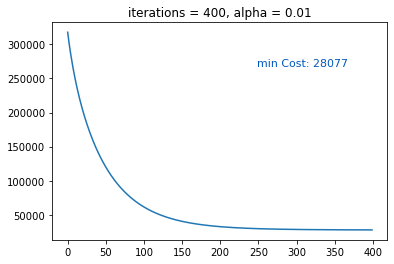

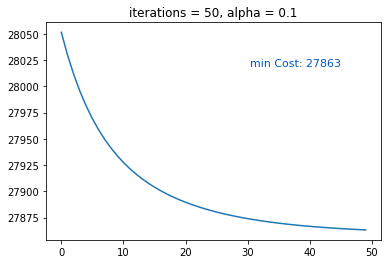

In [20]:
# Testing iterations and alpha values

train_X, val_X, train_y, val_y = train_test_split(X, y)

train_X = train_X.to_numpy()
train_X, mu, sigma = feature_norm(train_X)
train_y = train_y.to_numpy()

shape = train_X.shape
m = shape[0]
j = shape[1]+1
train_X = np.c_[np.ones(m), train_X]
theta = np.ones(j)

iterations = 400
alpha = 0.01
theta, J_history = gradient_descent(train_X, train_y, theta, alpha, iterations)
fig1, ax1 = plt.subplots()
ax1.plot(J_history)
ax1.set_title('iterations = 400, alpha = 0.01')
ax1.annotate(f'min Cost: {round(J_history[-1])}', xy=(0.61,0.8),xycoords='axes fraction',
             fontsize=11, color= [0, 0.3470, 0.7410])

iterations = 50
alpha = 0.1
theta, J_history = gradient_descent(train_X, train_y, theta, alpha, iterations)
fig2, ax2 = plt.subplots()
ax2.plot(J_history);
ax2.set_title('iterations = 50, alpha = 0.1')
ax2.annotate(f'min Cost: {round(J_history[-1])}', xy=(0.61,0.8),xycoords='axes fraction',
             fontsize=11, color= [0, 0.3470, 0.7410])

plt.show()

In [21]:
mean_absolute_error_arr = np.zeros(5)
r_squared_arr = np.zeros(5)

for x in range(5):
    train_X, val_X, train_y, val_y = train_test_split(X, y)

    val_X = val_X.to_numpy()
    val_y = val_y.to_numpy()

    theta, mu, sigma = total_manual_fit(train_X, train_y)

    val_X = (val_X - mu) / sigma
    val_X = np.c_[np.ones(val_X.shape[0]), val_X]

    val_predictions = predict(val_X, theta)

    mean_absolute_error_arr[x] = mean_absolute_error(val_y, val_predictions)
    r_squared_arr[x] = r_squared(val_y, val_predictions)

In [22]:
# Using sklearn's LinearRegression
sk_mean_absolute_error_arr = np.zeros(5)
sk_r_squared_arr = np.zeros(5)

for x in range(5):
    train_X, val_X, train_y, val_y = train_test_split(X, y)
    
    sklearn_model = LinearRegression()
    sklearn_model.fit(train_X, train_y)
    
    val_predictions = sklearn_model.predict(val_X)
    
    sk_mean_absolute_error_arr[x] = mean_absolute_error(val_y, val_predictions)
    sk_r_squared_arr[x] = sklearn_model.score(val_X,val_y)

In [23]:
# Comparing linreg numpy implementation and sklearn's LinearRegression

print('numpy linreg:')
print(f'Mean absolute error: {mean_absolute_error_arr.mean().round(2)}')
print(f'R squared: {r_squared_arr.mean().round(4)}\n')

print('sklearn linreg:')
print(f'Mean absolute error: {sk_mean_absolute_error_arr.mean().round(2)}')
print(f'R squared: {sk_r_squared_arr.mean().round(4)}')

numpy linreg:
Mean absolute error: 148.83
R squared: 0.6752

sklearn linreg:
Mean absolute error: 148.31
R squared: 0.6837
